<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



https://github.com/alessandrossC/ML-for-people/blob/main/process_bank_churn.py

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
!wget -O process_bank_churn.py https://raw.githubusercontent.com/alessandrossC/ML-for-people/main/process_bank_churn.py

--2025-02-09 18:24:21--  https://raw.githubusercontent.com/alessandrossC/ML-for-people/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6466 (6.3K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]   6.31K  --.-KB/s    in 0s      

2025-02-09 18:24:21 (25.9 MB/s) - ‘process_bank_churn.py’ saved [6466/6466]



In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import sys

# Добавляем текущую папку в пути Python
sys.path.append(".")

# Пробуем импортировать
from process_bank_churn import process_data



In [78]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
processed_data = process_data(df, scaler_numeric=True)
print(processed_data)


{'train_x':        CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0         0.599045  0.214286     0.1  0.626382       0.000000        1.0   
1         0.603819  0.375000     0.2  0.848836       0.000000        1.0   
2         0.653938  0.303571     0.6  0.554522       0.333333        1.0   
3         0.568019  0.714286     0.0  0.000000       0.333333        0.0   
4         0.658711  0.053571     0.3  0.000000       0.333333        1.0   
...            ...       ...     ...       ...            ...        ...   
11995     0.482100  0.267857     0.4  0.000000       0.333333        0.0   
11996     0.577566  0.392857     0.1  0.000000       0.000000        1.0   
11997     0.453461  0.196429     0.8  0.000000       0.333333        1.0   
11998     0.379475  0.428571     0.7  0.000000       0.333333        0.0   
11999     0.272076  0.160714     0.2  0.000000       0.333333        1.0   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [79]:
import pandas as pd

# Загружаем данные
df = pd.read_csv("/content/train.csv")

# Выводим информацию о данных перед обработкой
print("До обработки:")
print(df.info())

# Выводим количество уникальных значений в категориальных колонках
print("\nКатегориальные колонки и их уникальные значения:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()}")

# Выведем первые строки данных
print("\nПервые строки данных:")
print(df.head())



До обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB
None

Категориальные колонки и их уникальные значения:
Surname: 764
Geography:

In [80]:
import pandas as pd
from process_bank_churn import process_data

import pandas as pd
from process_bank_churn import process_data

df = pd.read_csv("/content/train.csv")
processed_data = process_data(df, scaler_numeric=False)

train_x = processed_data["train_x"]
train_y = processed_data["train_y"]
val_x = processed_data["val_x"]
val_y = processed_data["val_y"]




In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Обучаем модель Decision Tree с фиксированным random_state
dt_model = DecisionTreeClassifier(random_state=42)
# Обучаем на тренировочных данных
dt_model.fit(train_x, train_y)

# Делаем предсказания на валидационных данных
y_pred = dt_model.predict(val_x)

# Оцениваем качество модели
accuracy = accuracy_score(val_y, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8397


In [82]:
from sklearn.metrics import roc_auc_score

# Вычисляем AUC-ROC для тренировочных данных
train_auc = roc_auc_score(train_y, dt_model.predict_proba(train_x)[:, 1])

# Вычисляем AUC-ROC для тестовых данных
val_auc = roc_auc_score(val_y, dt_model.predict_proba(val_x)[:, 1])

print(f"Train ROC AUC: {train_auc:.4f}")
print(f"Validation ROC AUC: {val_auc:.4f}")


Train ROC AUC: 1.0000
Validation ROC AUC: 0.7700


In [83]:
# Выводим глубину обученного дерева
print(f"Глубина дерева: {dt_model.get_depth()}")

Глубина дерева: 26


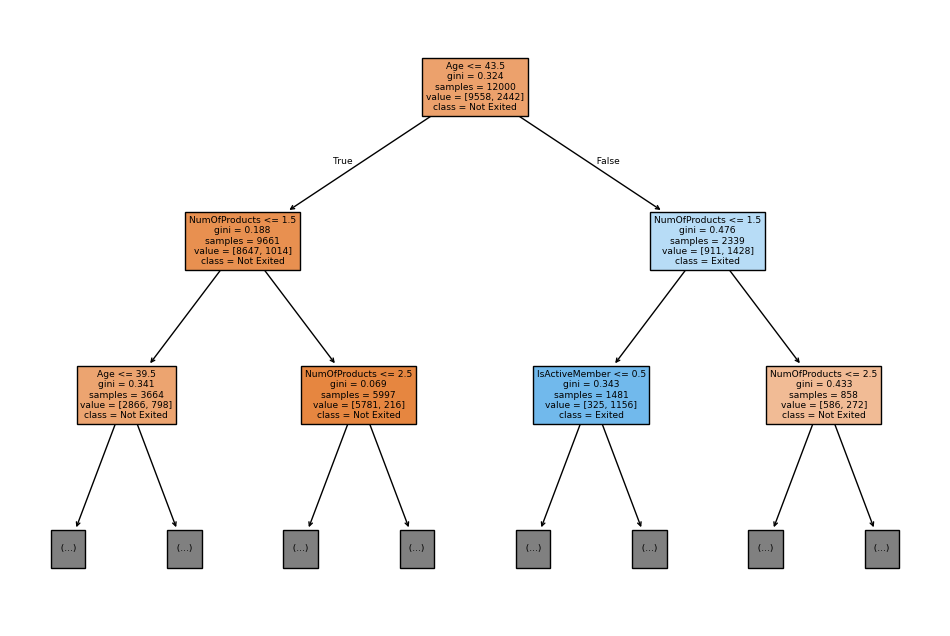

In [84]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Визуализация дерева до глубины 2
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=train_x.columns, class_names=["Not Exited", "Exited"], filled=True, max_depth=2)
plt.show()


Найвпливові ознаки Age, NumOfProducts, IsActiveMember

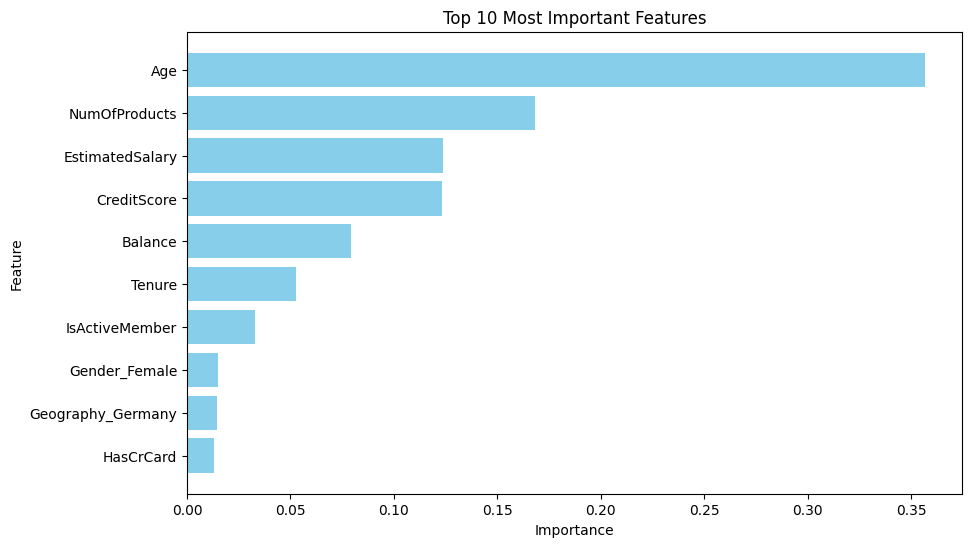

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Отримання важливостей ознак
feature_importances = dt_model.feature_importances_

# Створення датафрейму з важливостями ознак
importance_df = pd.DataFrame({
    'feature': train_x.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Виведення топ-10 найвпливовіших ознак
top_10_features = importance_df.head(10)

# Побудова барплоту для топ-10 ознак
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='skyblue')
plt.gca().invert_yaxis()  # Інвертуємо осі для візуального читання
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Ініціалізуємо змінні для збереження найкращих результатів
best_params = None
best_train_auc = 0
best_val_auc = 0

# Перебираємо різні значення max_leaf_nodes і max_depth
for max_leaf_nodes in [5, 10, 20, 50, 100]:
    for max_depth in [2, 4, 6, 8, 10]:
        # Створюємо та навчаємо модель з поточними параметрами
        dt_model = DecisionTreeClassifier(
            max_leaf_nodes=max_leaf_nodes,
            max_depth=max_depth,
            random_state=42
        )
        dt_model.fit(train_x, train_y)

        # Обчислюємо AUROC для тренувальної та валідаційної вибірок
        train_auc = roc_auc_score(train_y, dt_model.predict_proba(train_x)[:, 1])
        val_auc = roc_auc_score(val_y, dt_model.predict_proba(val_x)[:, 1])

        # Зберігаємо параметри, якщо результат на валідації найкращий
        if val_auc > best_val_auc:
            best_params = {'max_leaf_nodes': max_leaf_nodes, 'max_depth': max_depth}
            best_train_auc = train_auc
            best_val_auc = val_auc

# Виведення найкращих параметрів і відповідних результатів AUROC
best_params, best_train_auc, best_val_auc


({'max_leaf_nodes': 50, 'max_depth': 8},
 0.9311675782956385,
 0.9237564304822005)

Модель добре генералізує, оскільки AUROC на тренувальній та валідаційній вибірках близькі.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

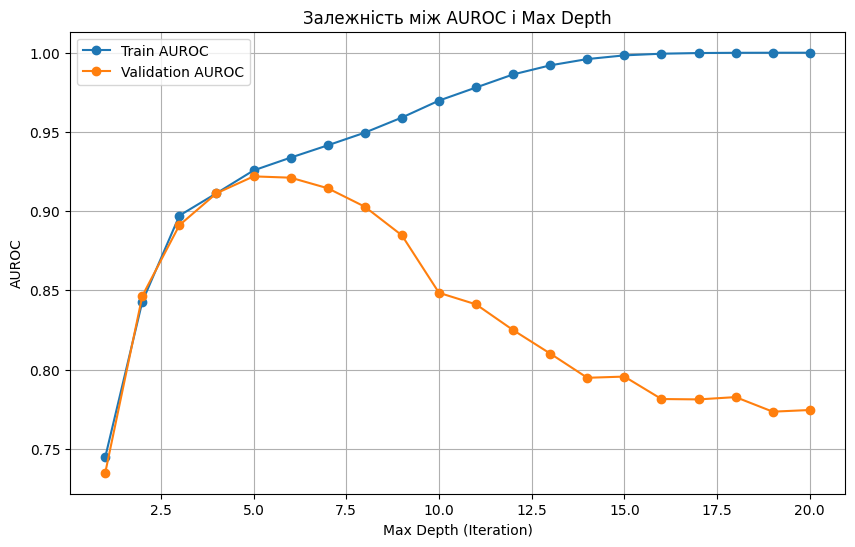

In [87]:
import matplotlib.pyplot as plt

# Зберігаємо результати для графіка
train_auc_scores = []
val_auc_scores = []

# Проходимо по значенням max_depth від 1 до 20
for max_depth in range(1, 21):
    # Створюємо модель
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(train_x, train_y)

    # Обчислюємо AUROC для тренувальної та валідаційної вибірок
    train_auc = roc_auc_score(train_y, dt_model.predict_proba(train_x)[:, 1])
    val_auc = roc_auc_score(val_y, dt_model.predict_proba(val_x)[:, 1])

    # Зберігаємо результати
    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

# Побудова графіка залежності
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_auc_scores, label='Train AUROC', marker='o')
plt.plot(range(1, 21), val_auc_scores, label='Validation AUROC', marker='o')
plt.xlabel('Max Depth (Iteration)')
plt.ylabel('AUROC')
plt.title('Залежність між AUROC і Max Depth')
plt.legend()
plt.grid()
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [88]:
# Встановимо найкраще значення max_depth вручну
best_max_depth = 5

# Створюємо модель DecisionTree з найкращим max_depth
best_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Навчання моделі
best_dt_model.fit(train_x, train_y)

# Обчислення AUROC для тренувальної та валідаційної вибірок
train_auc = roc_auc_score(train_y, best_dt_model.predict_proba(train_x)[:, 1])
val_auc = roc_auc_score(val_y, best_dt_model.predict_proba(val_x)[:, 1])

# Виведення результатів
train_auc, val_auc



(0.9256944626530315, 0.9219267439467729)

In [89]:
# Завантаження тестових даних
test_data_path = "/content/test.csv"
test_df = pd.read_csv(test_data_path)

# Виведемо перші рядки тестового датасету, щоб перевірити структуру
test_df.head()


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [103]:
# Імпортуємо функції з process_bank_churn.py
from process_bank_churn import process_data, preprocess_new_data

# Завантаження тестових даних
test_data_path = "/content/test.csv"
test_df = pd.read_csv(test_data_path)

# Завантаження тренувальних даних для підготовки encoder
train_data_path = "/content/train.csv"
train_df = pd.read_csv(train_data_path)

# Отримуємо оброблені тренувальні дані та encoder
processed_data = process_data(train_df, scaler_numeric=True)
train_x = processed_data["train_x"]
train_y = processed_data["train_y"]
encoder = processed_data["encoder"]  # Навчений OneHotEncoder

# Перевіряємо, чи є 'id' у test_df
if 'id' not in test_df.columns:
    raise ValueError("Колонка 'id' відсутня у тестових даних!")

# Отримуємо список оригінальних колонок після OneHotEncoding
original_cat_features = encoder.get_feature_names_out().tolist()

processed_test_df = preprocess_new_data(test_df.drop(columns=['Surname'], errors='ignore'), encoder)  # Видаляємо "Surname"

# **Забезпечуємо співпадіння структури processed_test_df і train_x**
missing_cols = set(train_x.columns) - set(processed_test_df.columns)

# Додаємо відсутні колонки з нулями
for col in missing_cols:
    processed_test_df[col] = 0

# **Упорядковуємо стовпці в processed_test_df**
processed_test_df = processed_test_df[train_x.columns]

# **Виконуємо передбачення на тестових даних**
test_predictions = best_dt_model.predict_proba(processed_test_df)[:, 1]

# **Створення submission.csv**
submission = pd.DataFrame({
    'id': test_df['id'],  # Використовуємо реальний ID з test_df
    'Exited': test_predictions
})

# Збереження у файл CSV
submission_path = "/content/submission.csv"
submission.to_csv(submission_path, index=False)

# Виведення перших рядків submission.csv
submission.head()

,id,Exited
0,15000,0.237911
1,15001,0.027613
2,15002,0.027613
3,15003,0.770925
4,15004,0.027613


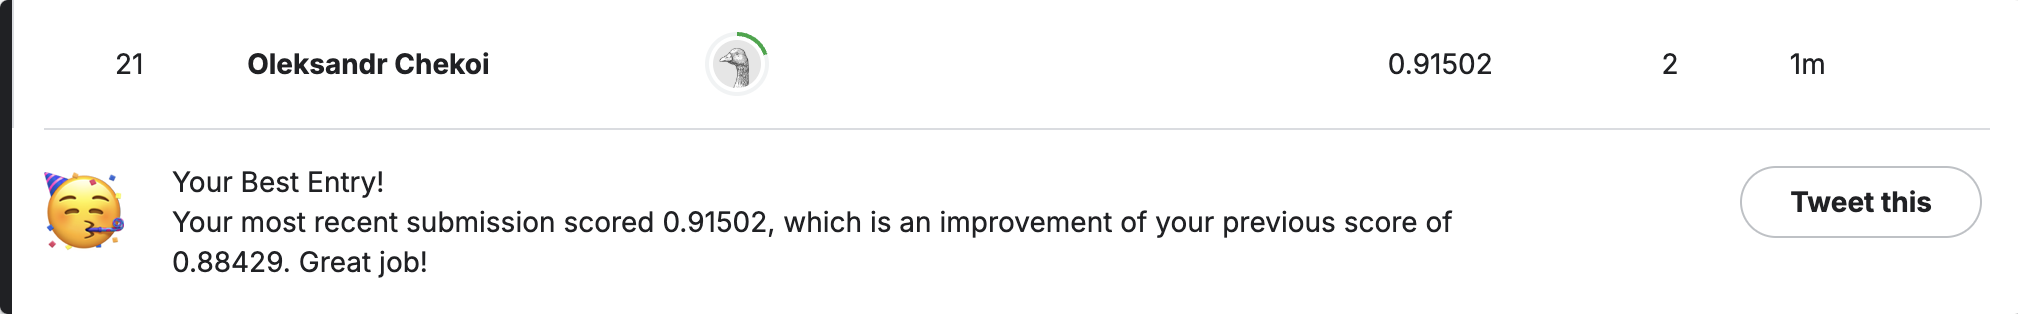